# Получение данных

Вообще в данный момент не отображаются графики в разделе браузеров, поэтому нет возможности получить это информацию.
Поэтому я аоспользуюсь csv выложенной в телеграмме.
Но вообще их надо извлечь примерно так, как написано ниже.
Там даже для нужного промежутка дат.

In [224]:
import requests
import json
import datetime
import pandas as pd
from collections import defaultdict
from pandas import DataFrame
import matplotlib.pyplot as plt 
import statsmodels as sm
import numpy as np

In [172]:
def browsers_json_url():
    return "https://top.mail.ru/json/visits.hc?id=1839501&amp;period=0&amp;date=2017-11-21&amp;&back=1420&_=0.9401818630165149"

def get_browser_data():
    url = browsers_json_url()
    resp = requests.get(url)
    return json.loads(resp.text)

def parse_mail_json(json):
    data = pd.DataFrame()
    for s in json['series']:
        if s['name'] == 'Просмотры':
            data = pd.DataFrame(s['data'])
    return data

In [173]:
json_data = get_browser_data()
df = parse_mail_json(json_data)
df.head()

,date,x,y
0,1 янв 2014,1388520000000,50483789
1,2 янв 2014,1388606400000,59510378
2,3 янв 2014,1388692800000,62937023
3,4 янв 2014,1388779200000,63904813
4,5 янв 2014,1388865600000,65581281


Теперь csv из телеграмма:

In [174]:
data = pd.read_csv('df0.csv', parse_dates=True)

In [175]:
data.head()

,date,se,browser,hits
0,2014-01-01,search,chrome,44778823.0
1,2014-01-01,yandex,chrome,16237589.0
2,2014-01-02,search,chrome,52448725.0
3,2014-01-02,yandex,chrome,18979110.0
4,2014-01-03,search,chrome,54640145.0


# Нарисуем данные

In [513]:
browsers = set()
for browser in data['browser']:
    browsers.add(browser)
print(browsers)

{'msie', 'firefox', 'chrome', 'opera', 'yabrowser'}


In [514]:
yandex_hits_by_browsers = {'msie':DataFrame(),
                           'firefox':DataFrame(),
                           'chrome':DataFrame(),
                           'opera':DataFrame(),
                           'yabrowser':DataFrame()}
search_hits_by_browsers = {'msie':DataFrame(),
                           'firefox':DataFrame(),
                           'chrome':DataFrame(),
                           'opera':DataFrame(),
                           'yabrowser':DataFrame()}

In [515]:
for index, row in data.iterrows():
    date = row['date']
    se = row['se']
    browser = row['browser']
    hits = row['hits']
    if se == 'yandex':
        new_data = DataFrame({'date':[date], 'hits':[hits]})
        yandex_hits_by_browsers[browser] = yandex_hits_by_browsers[browser].append(new_data, ignore_index=True)
    else:
        new_data = DataFrame({'date':[date], 'hits':[hits]})
        search_hits_by_browsers[browser] = search_hits_by_browsers[browser].append(new_data, ignore_index=True)

In [516]:
for browser in browsers:
    yandex_hits_by_browsers[browser].index = pd.to_datetime(yandex_hits_by_browsers[browser]['date'], format="%Y-%m-%d")
    yandex_hits_by_browsers[browser] = yandex_hits_by_browsers[browser].asfreq('d')
    search_hits_by_browsers[browser].index = pd.to_datetime(search_hits_by_browsers[browser]['date'], format="%Y-%m-%d")
    search_hits_by_browsers[browser] = search_hits_by_browsers[browser].asfreq('d')

In [517]:
yandex_hits_by_browsers['opera'].index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2017-09-19', '2017-09-20', '2017-09-21', '2017-09-22',
               '2017-09-23', '2017-09-24', '2017-09-25', '2017-09-26',
               '2017-09-27', '2017-09-28'],
              dtype='datetime64[ns]', name='date', length=1367, freq='D')

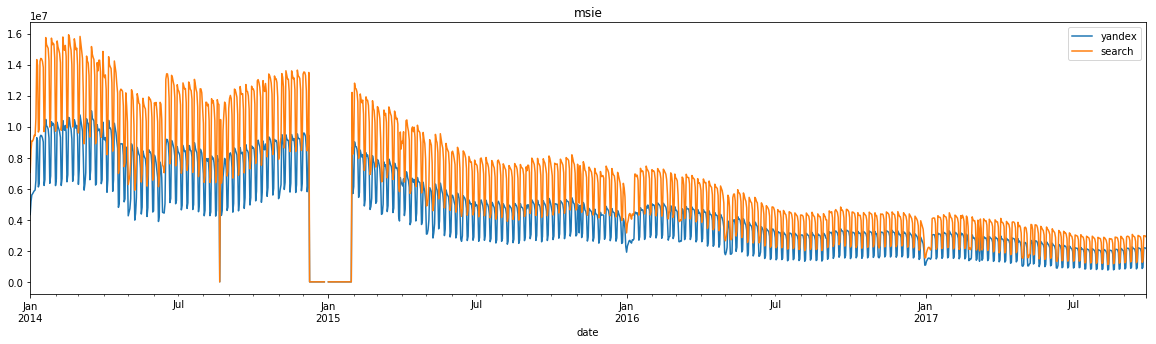

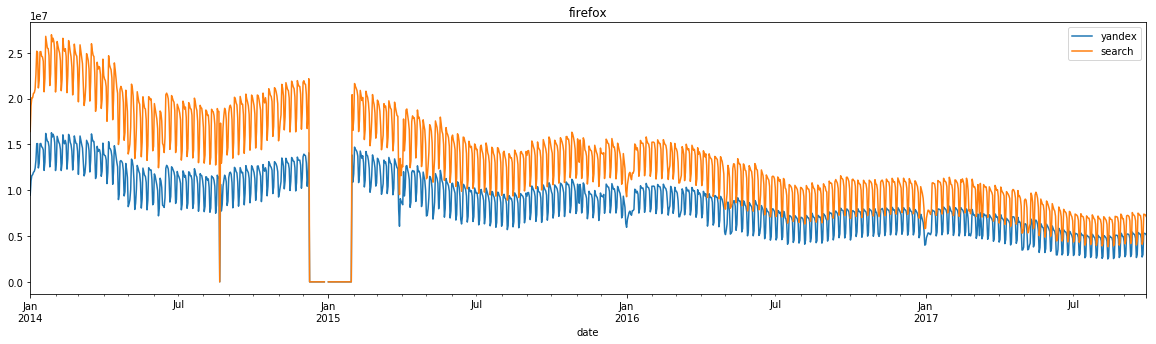

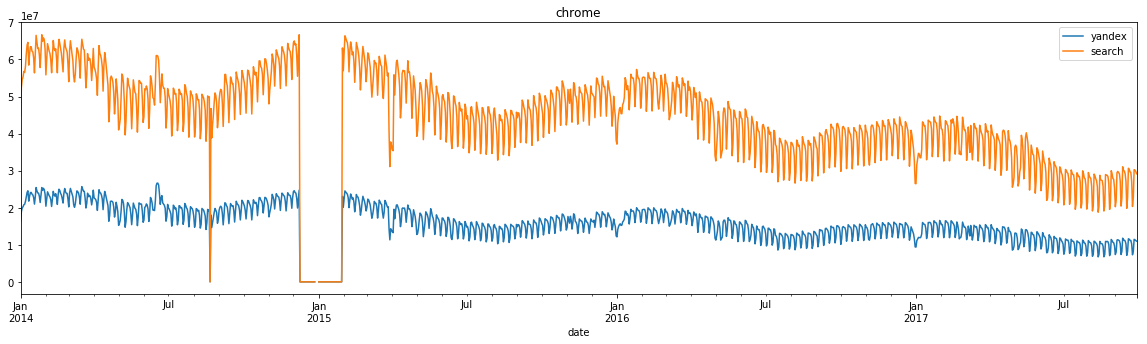

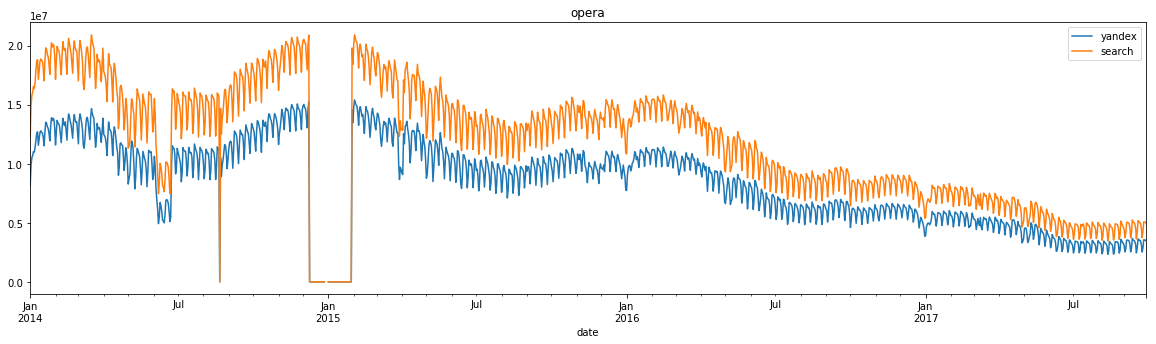

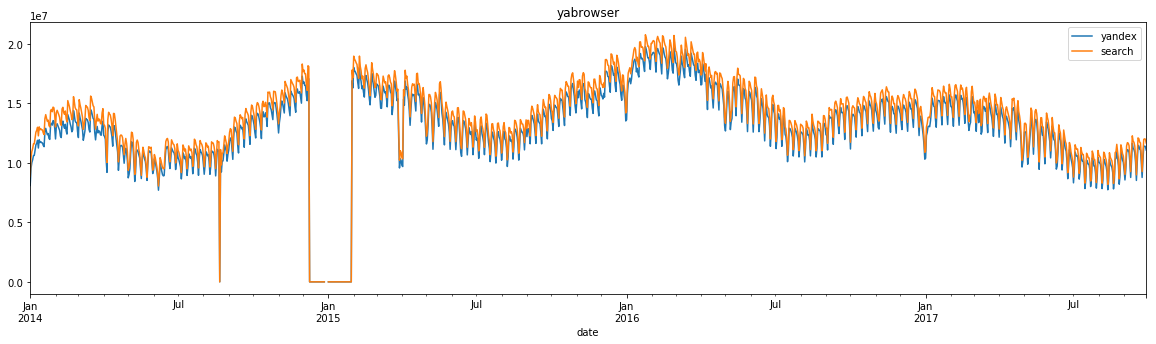

In [518]:
for browser in browsers:
    yandex_hits_by_browsers[browser].hits.plot(figsize=(20, 5), label="yandex", legend=True)
    search_hits_by_browsers[browser].hits.plot(figsize=(20, 5), label="search", legend=True)
    plt.title(browser)
    plt.show()

# Устранение аномалий

Видим, что много значений отсутствуют в конце 2014, начале 2015 года - делаем заплатку из следующего года.

In [519]:
yandex_hits_by_browsers['opera']['2014-12-01':'2015-02-01']

,date,hits
date,,
2014-12-01,2014-12-01,14917799.0
2014-12-02,2014-12-02,15011813.0
2014-12-03,2014-12-03,14734976.0
2014-12-04,2014-12-04,14689607.0
2014-12-05,2014-12-05,13944039.0
2014-12-06,2014-12-06,13039953.0
2014-12-07,2014-12-07,14576310.0
2014-12-08,2014-12-08,15251118.0
2014-12-09,2014-12-09,0.0


2014-12-09 вторник
2015-12-09 среда
значит, для сохранения цикличности надо брать промежуток на 1 день поменьше следующего года

In [520]:
for browser in browsers:
    # yandex
    coef = (yandex_hits_by_browsers[browser].loc['2014-12-08']['hits'] + yandex_hits_by_browsers[browser].loc['2015-01-30']['hits'])\
    / (yandex_hits_by_browsers[browser].loc['2015-12-07']['hits'] + yandex_hits_by_browsers[browser].loc['2016-01-29']['hits'])
    for date, new_date in zip(pd.date_range('2014-12-09', '2015-01-29'), pd.date_range('2015-12-09', '2016-01-29')):
        yandex_hits_by_browsers[browser].loc[date, 'hits'] = coef * yandex_hits_by_browsers[browser].loc[new_date, 'hits']
    # search
    coef = (search_hits_by_browsers[browser].loc['2014-12-08']['hits'] + search_hits_by_browsers[browser].loc['2015-01-30']['hits'])\
    / (search_hits_by_browsers[browser].loc['2015-12-07']['hits'] + search_hits_by_browsers[browser].loc['2016-01-29']['hits'])
    for date, new_date in zip(pd.date_range('2014-12-09', '2015-01-29'), pd.date_range('2015-12-09', '2016-01-29')):
        search_hits_by_browsers[browser].loc[date, 'hits'] = coef * search_hits_by_browsers[browser].loc[new_date, 'hits']

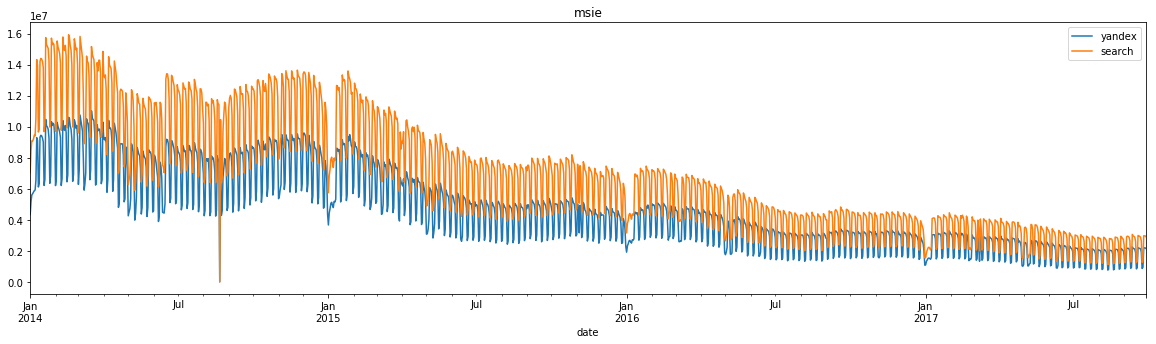

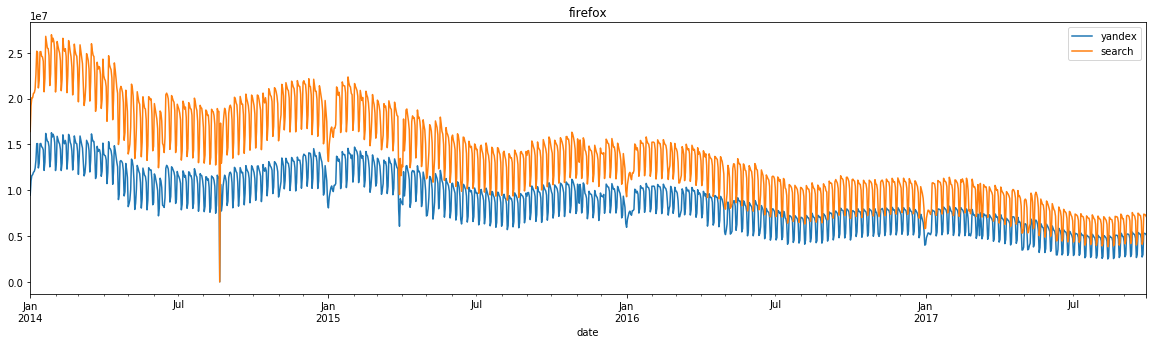

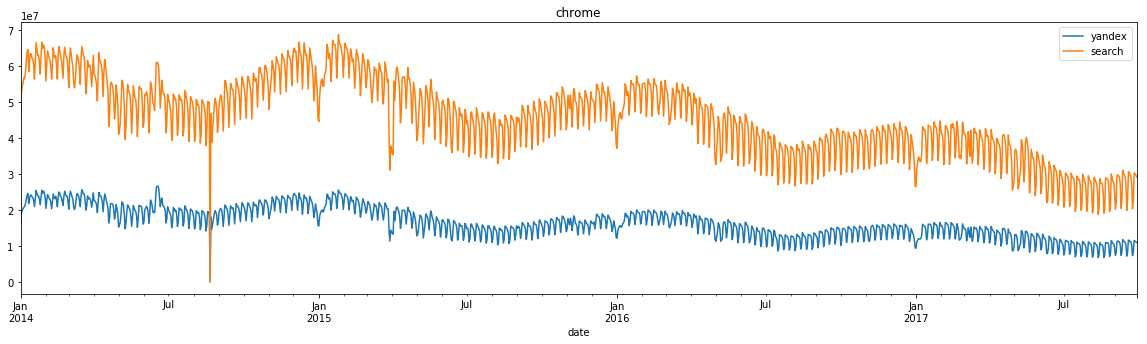

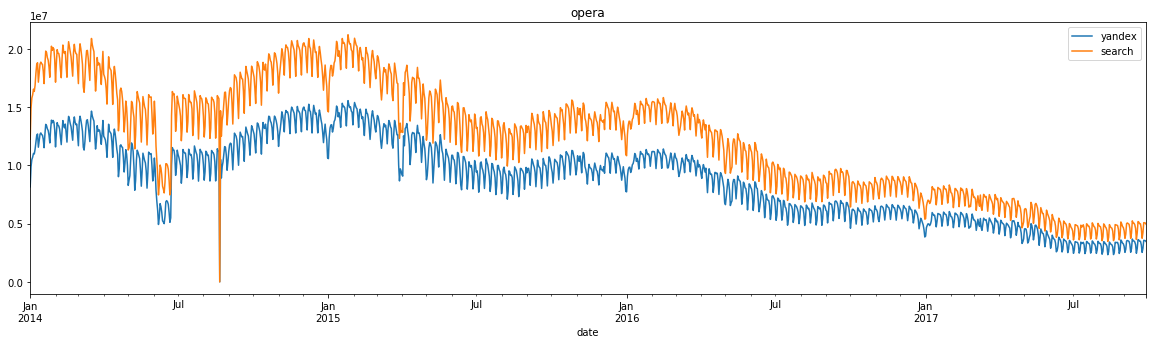

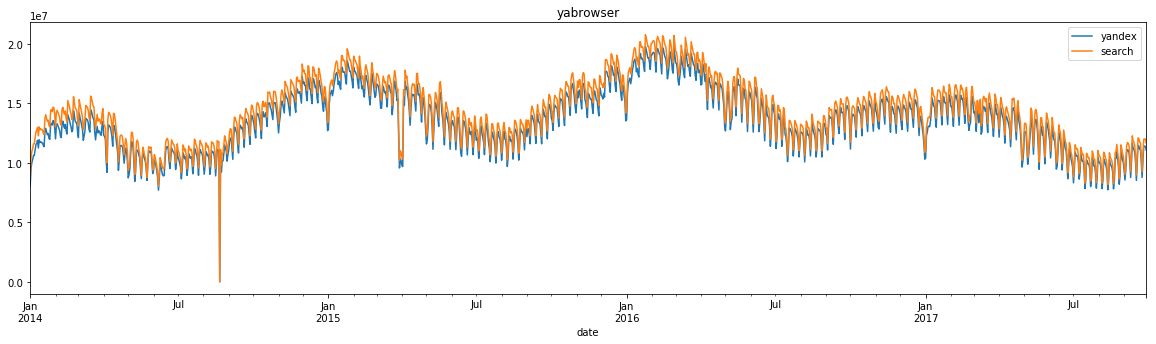

In [521]:
for browser in browsers:
    yandex_hits_by_browsers[browser].hits.plot(figsize=(20, 5), label="yandex", legend=True)
    search_hits_by_browsers[browser].hits.plot(figsize=(20, 5), label="search", legend=True)
    plt.title(browser)
    plt.show()

Получилось весьма неплохо. Теперь видим выброс в августе 2014. Избавимся от него.

In [522]:
yandex_hits_by_browsers['opera']['2014-08-01':'2014-09-01']

,date,hits
date,,
2014-08-01,2014-08-01,10087944.0
2014-08-02,2014-08-02,8729776.0
2014-08-03,2014-08-03,9447869.0
2014-08-04,2014-08-04,11215230.0
2014-08-05,2014-08-05,11113328.0
2014-08-06,2014-08-06,10851344.0
2014-08-07,2014-08-07,10888589.0
2014-08-08,2014-08-08,10184769.0
2014-08-09,2014-08-09,8654227.0


In [523]:
for browser in browsers:
    yandex_hits_by_browsers[browser].loc['2014-08-21', 'hits'] = \
    (yandex_hits_by_browsers[browser].loc['2014-08-14', 'hits'] + yandex_hits_by_browsers[browser].loc['2014-08-28', 'hits']) / 2
    search_hits_by_browsers[browser].loc['2014-08-21', 'hits'] = \
    (search_hits_by_browsers[browser].loc['2014-08-14', 'hits'] + search_hits_by_browsers[browser].loc['2014-08-28', 'hits']) / 2

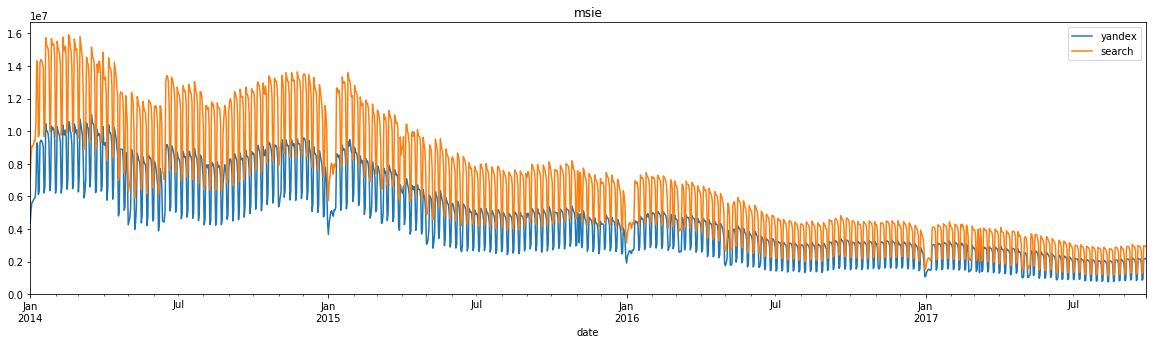

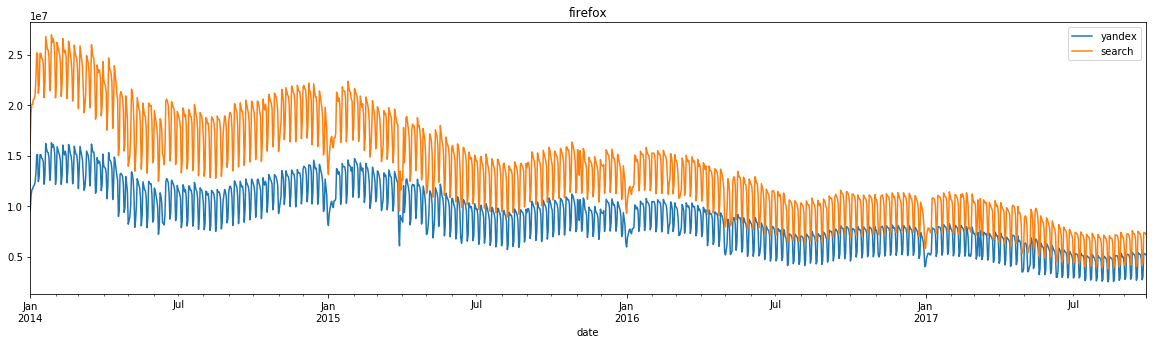

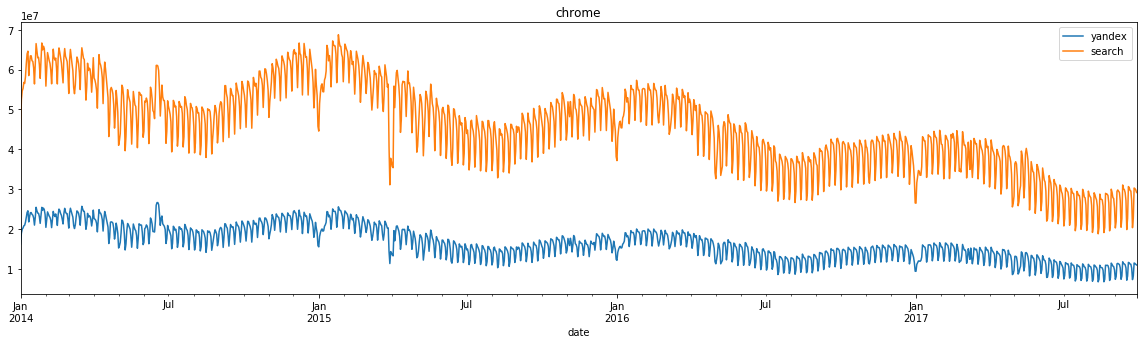

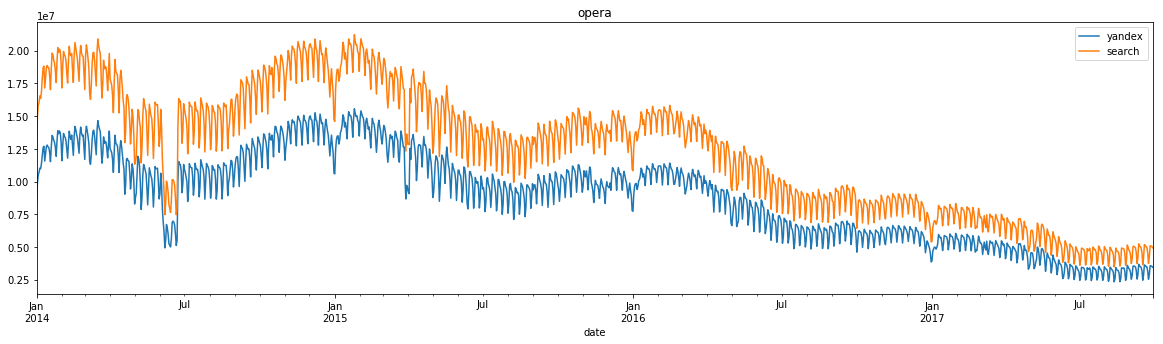

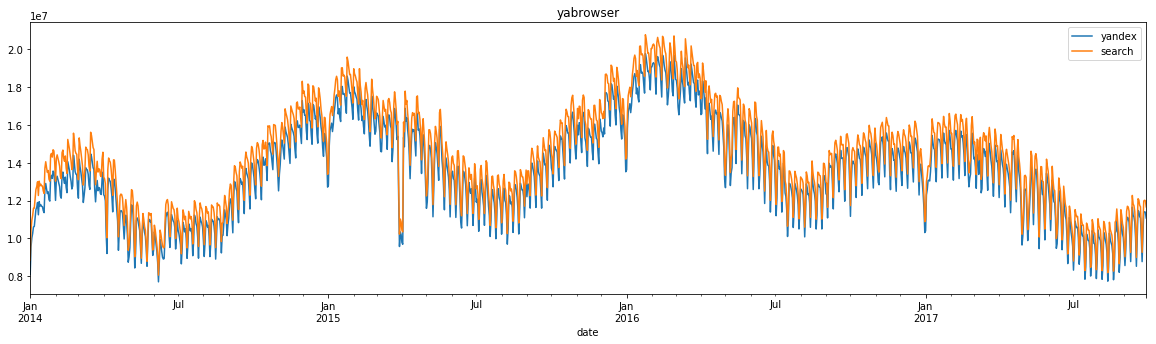

In [524]:
for browser in browsers:
    yandex_hits_by_browsers[browser].hits.plot(figsize=(20, 5), label="yandex", legend=True)
    search_hits_by_browsers[browser].hits.plot(figsize=(20, 5), label="search", legend=True)
    plt.title(browser)
    plt.show()

# Сезонность

In [526]:
for browser in browsers:
    yandex_cleared_hits_by_browsers[browser] = yandex_hits_by_browsers[browser].hits
    search_cleared_hits_by_browsers[browser] = search_hits_by_browsers[browser].hits

In [527]:
def plot_stl(browser, freq):
    res = sm.tsa.seasonal.seasonal_decompose(yandex_cleared_hits_by_browsers[browser].dropna(), freq=freq)
    res.seasonal.plot(figsize=(20, 5), label="seasonal yandex", legend=True)
    res.trend.plot(figsize=(20, 5), label="trend yandex", legend=True)
    yandex_cleared_hits_by_browsers[browser] = res.trend
    res = sm.tsa.seasonal.seasonal_decompose(search_cleared_hits_by_browsers[browser].dropna(), freq=freq)
    res.seasonal.plot(figsize=(20, 5), label="seasonal search", legend=True)
    res.trend.plot(figsize=(20, 5), label="trend search", legend=True)
    search_cleared_hits_by_browsers[browser] = res.trend
    plt.title('browser: ' + browser + '; ' + 'seasonal: ' + str(freq))
    plt.show()

Избавляемся от недельной, месячной и годовой сезонностей.

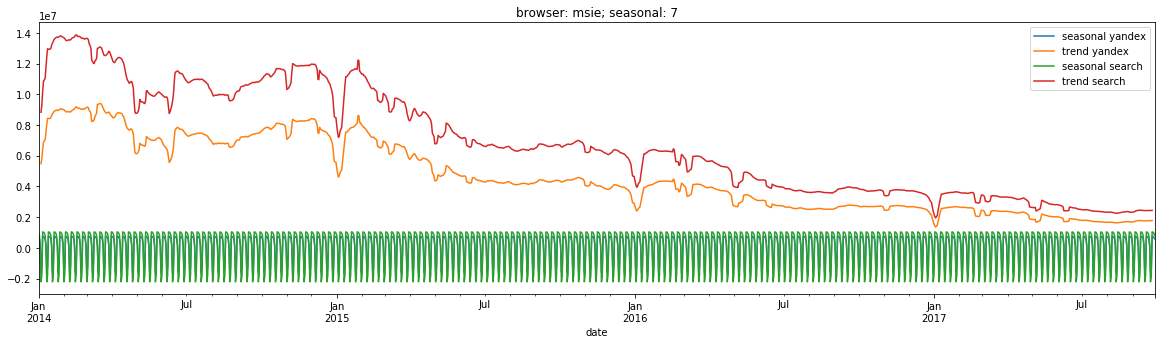

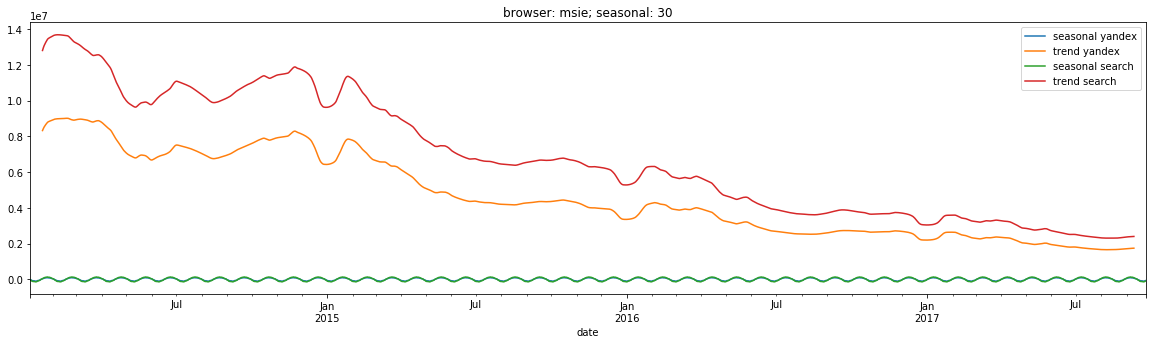

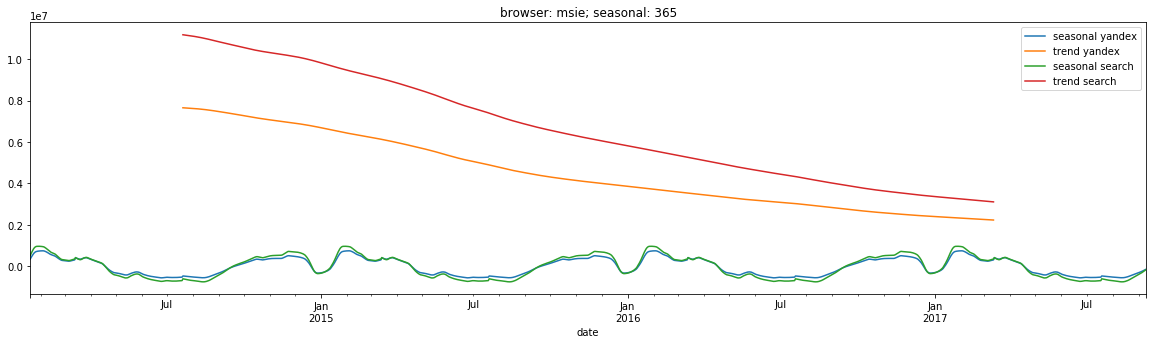

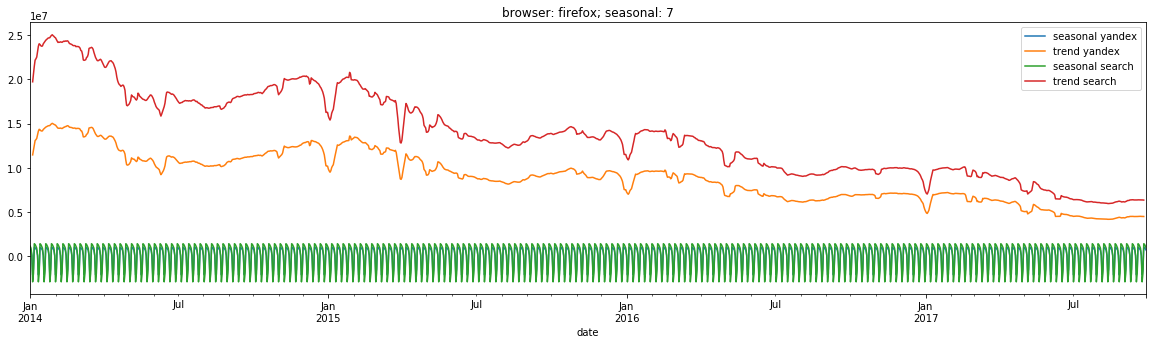

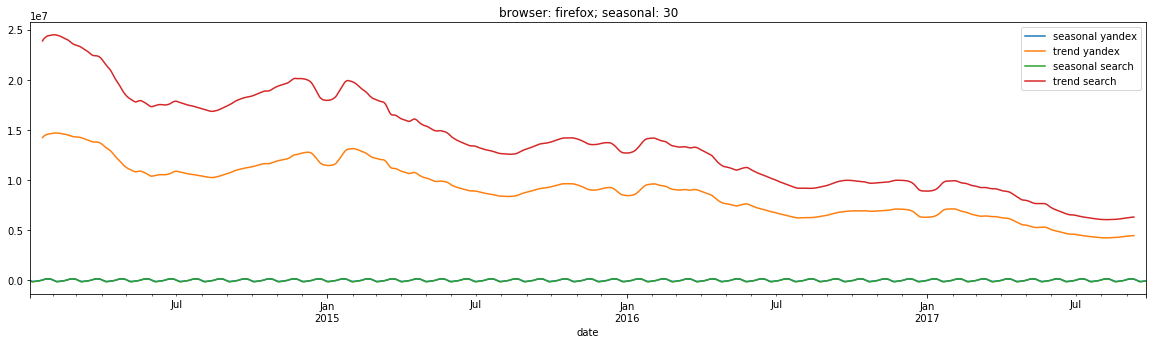

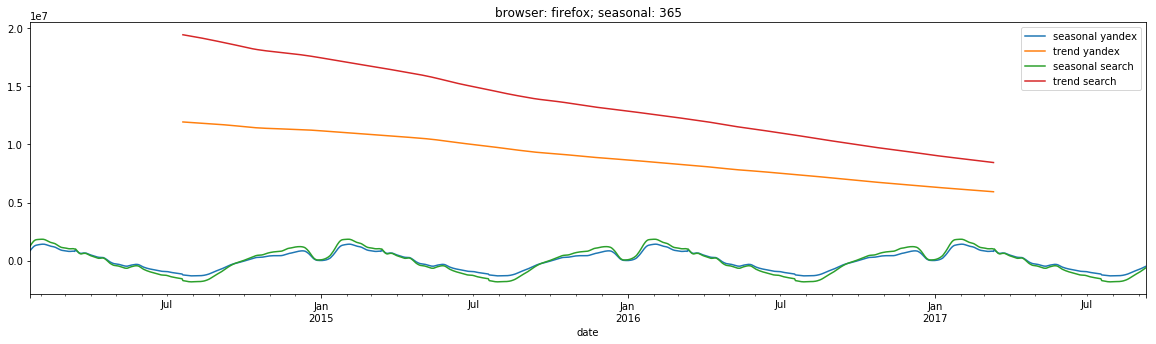

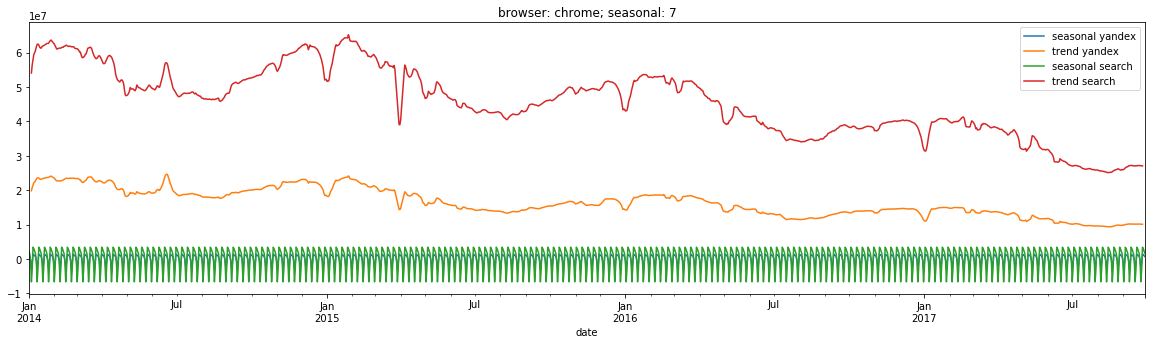

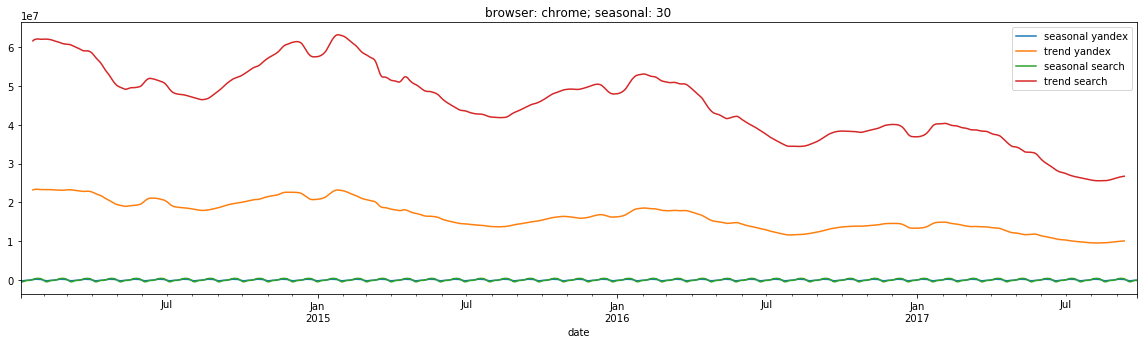

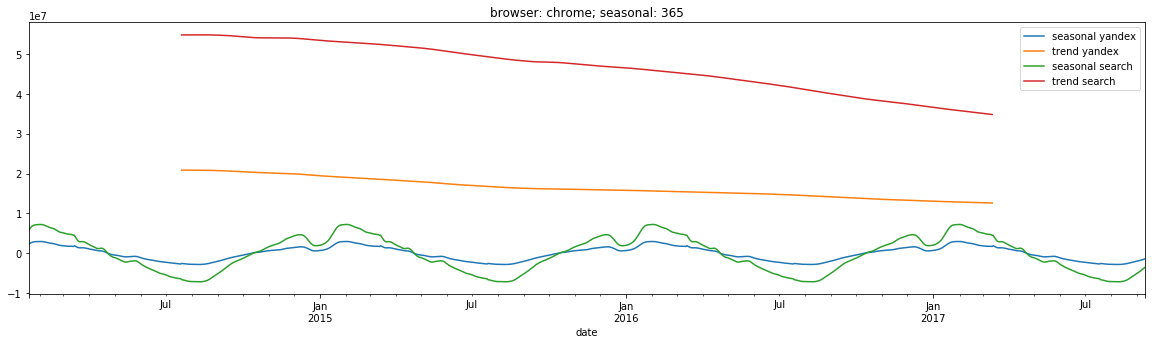

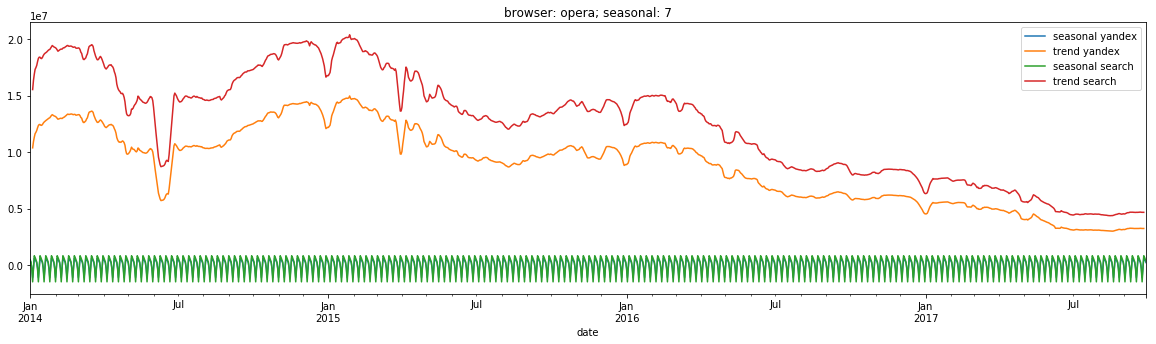

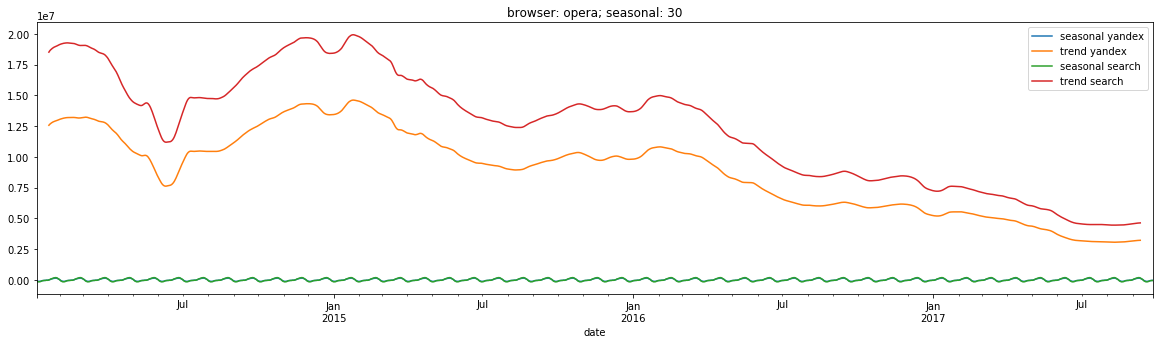

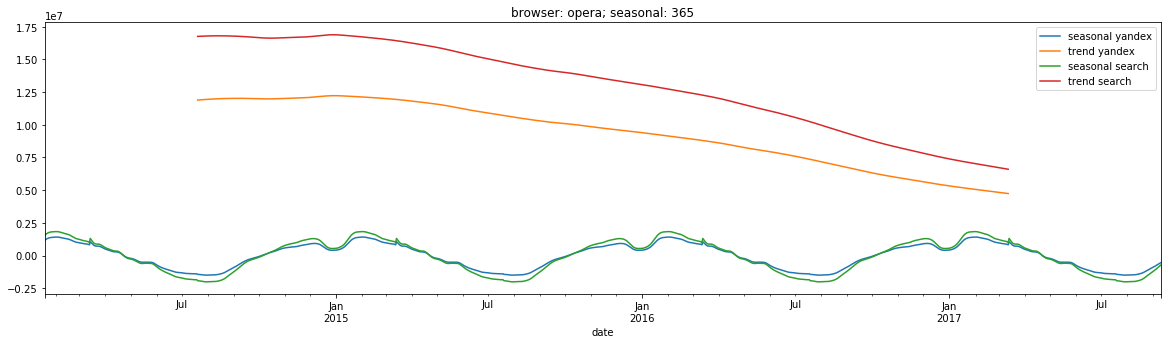

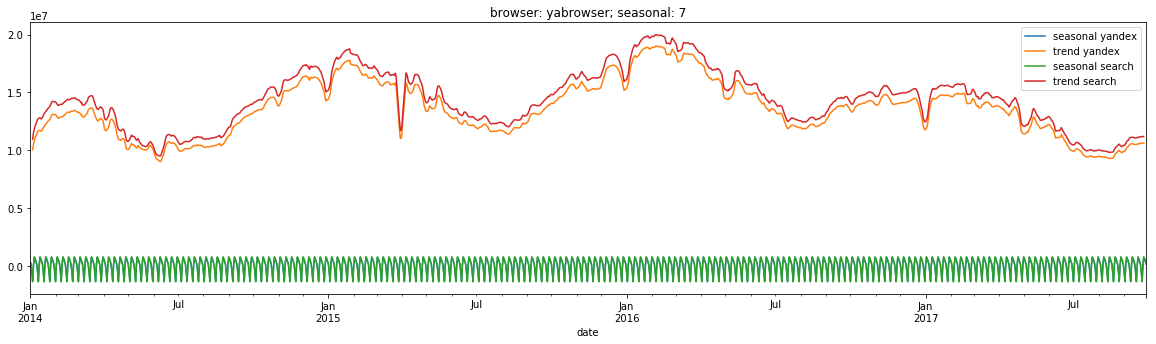

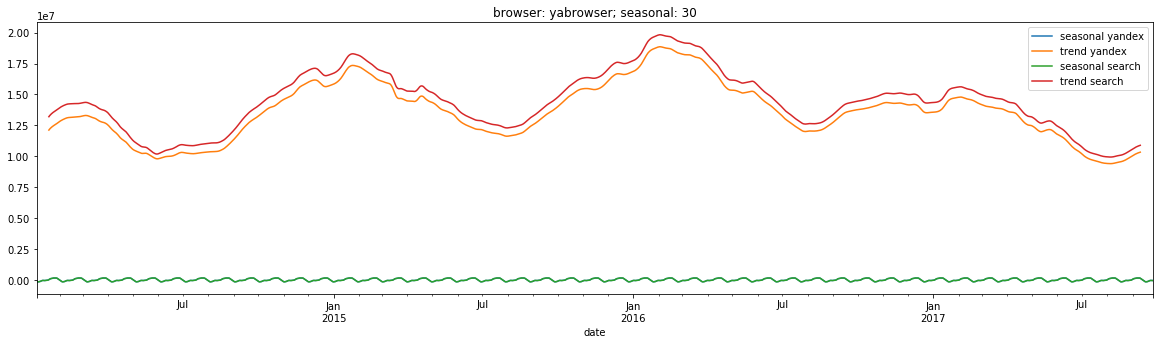

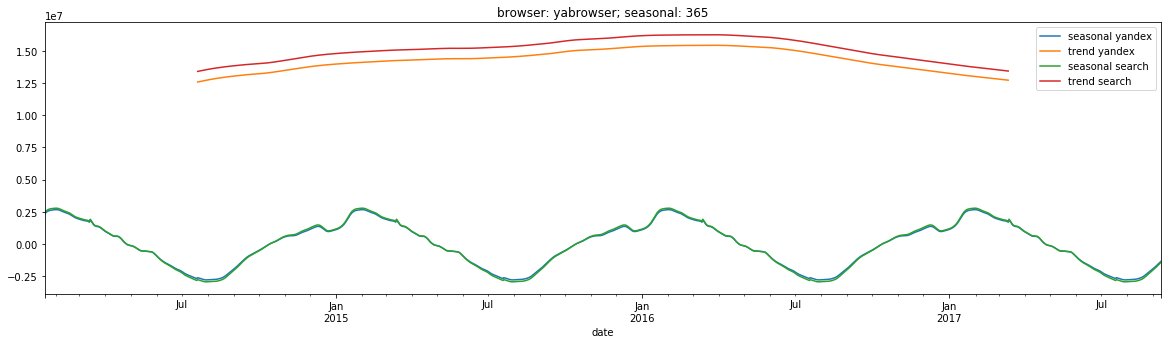

In [528]:
for browser in browsers:
    plot_stl(browser, 7)
    plot_stl(browser, 30)
    plot_stl(browser, 365)

Хочется отметить, что много где показатели просмотров как в целом так и в яндексе падают, что наверное, значит, что мейл (или сайты где стоят его счетчики) становится менее популярен.

Теперь я феноменально заметила, что задание подразумевает возвращение датасета конкретного вида. Но нужно много кода, чтобы восстановить эти данные. Поэтому я заполню только не которые колонки. В фильном выводе буду использовать только хороший годовой тренд.

In [529]:
for browser in browsers:
    yandex_cleared_hits_by_browsers[browser] = yandex_cleared_hits_by_browsers[browser].dropna()
    search_cleared_hits_by_browsers[browser] = search_cleared_hits_by_browsers[browser].dropna()

In [530]:
final_data = DataFrame()
for browser in browsers:
    for date, hits in yandex_cleared_hits_by_browsers[browser].iteritems():
        new_data = DataFrame({'date':[date],
                             'se':['yandex'],
                             'browser':[browser],
                             'hits_fixed':[yandex_hits_by_browsers[browser].loc[date, 'hits']],
                             'hits_year_trend':[hits]})
        final_data = final_data.append(new_data, ignore_index=True)
    for date, hits in search_cleared_hits_by_browsers[browser].iteritems():
        new_data = DataFrame({'date':[date],
                             'se':['search'],
                             'browser':[browser],
                             'hits_fixed':[search_hits_by_browsers[browser].loc[date, 'hits']],
                             'hits_year_trend':[hits]})
        final_data = final_data.append(new_data, ignore_index=True)

In [531]:
final_data.head()

,browser,date,hits_fixed,hits_year_trend,se
0,msie,2014-07-20,4979402.0,7.654422e+06,yandex
1,msie,2014-07-21,8965982.0,7.651797e+06,yandex
2,msie,2014-07-22,8663161.0,7.649157e+06,yandex
3,msie,2014-07-23,8452613.0,7.646523e+06,yandex
4,msie,2014-07-24,8330718.0,7.643933e+06,yandex


In [532]:
datetime_index = yandex_cleared_hits_by_browsers[browser].index

In [533]:
datetime_index

DatetimeIndex(['2014-07-20', '2014-07-21', '2014-07-22', '2014-07-23',
               '2014-07-24', '2014-07-25', '2014-07-26', '2014-07-27',
               '2014-07-28', '2014-07-29',
               ...
               '2017-03-03', '2017-03-04', '2017-03-05', '2017-03-06',
               '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10',
               '2017-03-11', '2017-03-12'],
              dtype='datetime64[ns]', name='date', length=967, freq='D')

# Доля яндекса

In [534]:
cleared_proportion = {'msie':[],
                       'firefox':[],
                       'chrome':[],
                       'opera':[],
                       'yabrowser':[]}

In [535]:
yandex_hits = {'msie':[],
               'firefox':[],
               'chrome':[],
               'opera':[],
               'yabrowser':[]}

In [536]:
search_hits = {'msie':[],
               'firefox':[],
               'chrome':[],
               'opera':[],
               'yabrowser':[]}

In [537]:
for index, row in final_data.iterrows():
    date = row['date']
    se = row['se']
    browser = row['browser']
    hits = row['hits_year_trend']
    if se == 'yandex':
        yandex_hits[browser].append(hits)
    if se == 'search':
        search_hits[browser].append(hits)

In [538]:
for browser in browsers:
    cleared_proportion[browser] = np.array(yandex_hits[browser]) / np.array(search_hits[browser])

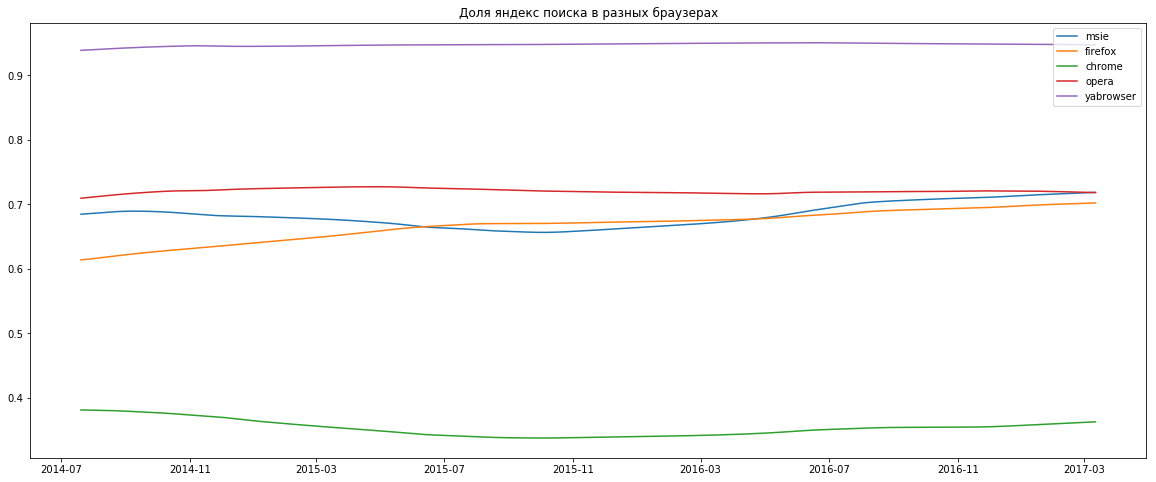

In [539]:
plt.figure(figsize=(20, 8))
for browser in browsers:
    plt.plot(datetime_index, cleared_proportion[browser], label=browser)
plt.title("Доля яндекс поиска в разных браузерах")
plt.legend()
plt.show()

Можно заметить, что в яндекс браузере доля Яндекс поиска самая высокая и она растет, хотя рост этот и сложно заметить, но там дальше просто некуда почти расти.

Доля яндекса в опере остается фактически без изменений.

В файерфоксе доля яндекса сильно росла во второй половине 2014 и первой половине 2015 года, потом стала расти медленнее.

В интернет эксполере доля яндекса сильно падала в середине 2015 года, потом резко возросла в середине 2016 и остается более менее стабильной. Переходный момент с убывания на возрастание - примерно октябрь 2015 года. 

В хроме похожая ситуация с интернет эксплорером. В хроме в целом меньше всего доля яндекса.

# Доля браузеров, среди поисков.

In [540]:
global_search = np.array(search_hits['msie']) + np.array(search_hits['opera']) + np.array(search_hits['firefox']) + np.array(search_hits['chrome']) + np.array(search_hits['yabrowser'])

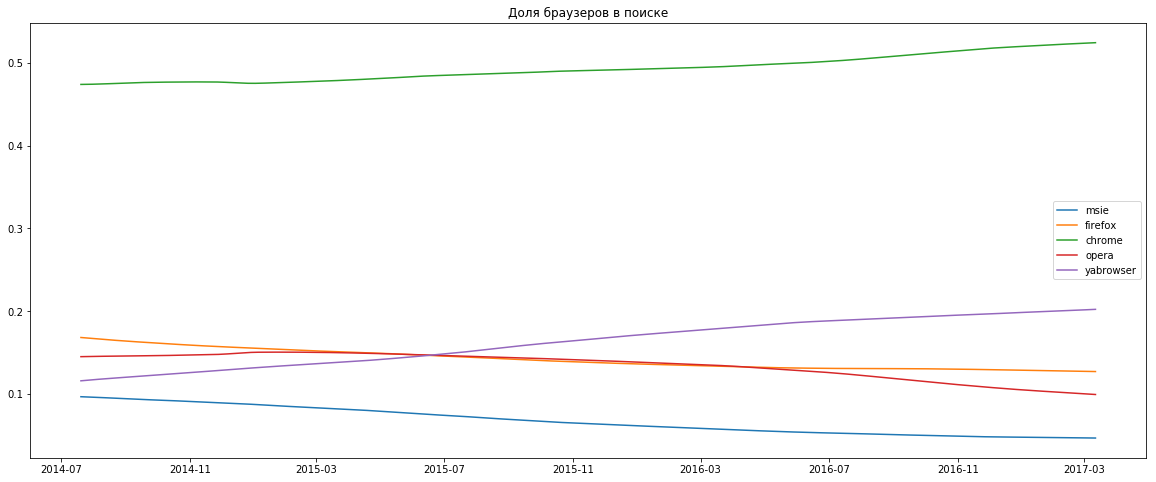

In [541]:
plt.figure(figsize=(20, 8))
for browser in browsers:
    plt.plot(datetime_index, np.array(search_hits[browser]) / global_search, label=browser)
plt.title("Доля браузеров в поиске")
plt.legend()
plt.show()

Доля хрома стабильно растет. Доля яндекс браузера тоже стабильно растет, но растет быстрее, чем у хрома.

Опера начала сдавать свои позиции в феврале 2015.
А файерфокс и интернет эксплорер стабильно сдают свои позиции все время.

Хром несомненный лидер, среди браузеов, его доля превышает 50 процентов с приблизительно марта 2016 года. 